In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [166]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Question 1 calculate BMI and create overweight column 

In [167]:
df['BMI'] = df['weight']/pow((df['height']/100), 2)
df.loc[df['BMI'] >= 25, 'overweight'] = 1
df.loc[df['BMI'] < 25, 'overweight'] = 0
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0.0


Question 2 Normalize Data

In [168]:
df.loc[df['gluc'] <= 1, 'gluc'] = 0
df.loc[df['cholesterol'] <= 1, 'cholesterol'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0


Question 3 cat plot

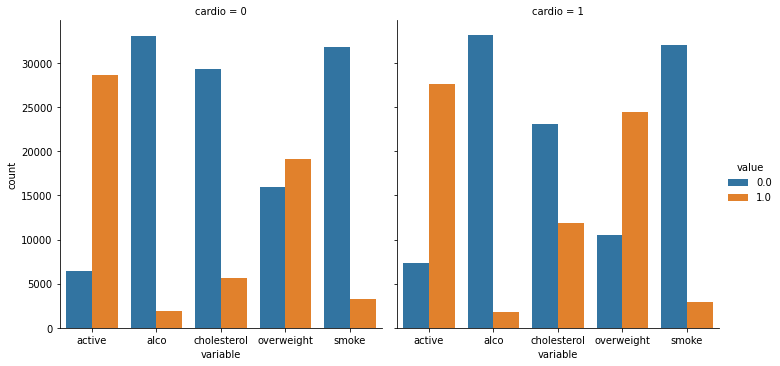

In [169]:
df2 = df.melt(id_vars=['cardio'], value_vars =['active','alco','cholesterol','overweight','smoke'])
sns.catplot(data=df2, kind='count', x='variable', hue='value', col='cardio')


Question 4 delete all the ap_lo higher than theap_hi

In [170]:
# df_hi = df[df['ap_lo'] <= df['ap_hi']]
df_hi = df[df['ap_lo'] >= df['ap_hi']].index
df.drop(df_hi, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1.0


Question 5 Delete Short people

In [171]:
h =df[df['height'] <= df['height'].quantile(0.025)].index
df.drop(h, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1.0


Question 6 Delete tall people

In [172]:
t =df[df['height'] >= df['height'].quantile(0.975)].index
df.drop(t, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1.0


Question 6 Delete skinny peple

In [173]:
s =df[df['weight'] <= df['weight'].quantile(0.025)].index
df.drop(s, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1.0


Question 7 delete fat people

In [174]:
o= df[df['weight'] >= df['weight'].quantile(0.957)].index
df.drop(o, inplace = True)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1.0


Question 8 heatmap

<AxesSubplot:>

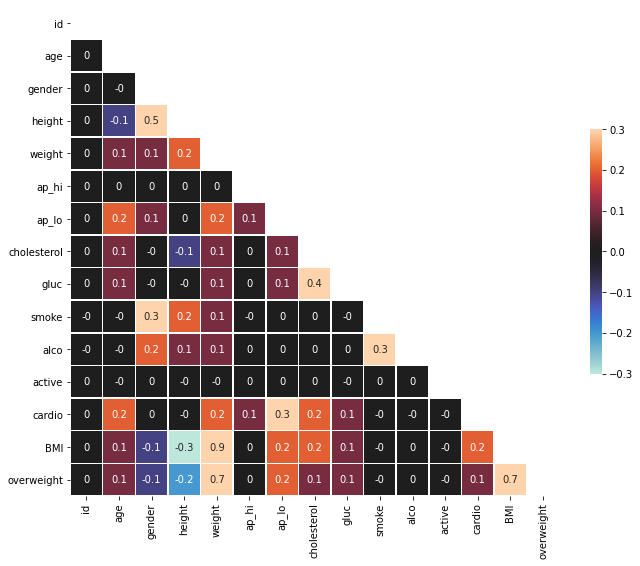

In [187]:
corr = df.corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax = .3 , center=0,
            square=True, linewidths=.5, annot= True, cbar_kws={"shrink": .5})

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1.0
